## Ensemble Methods

In [1]:
# Basic imports
import itertools
import numpy as np

# Visualization 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

# Imports datasets to test
from sklearn import datasets 

# Imports sklearn for model implementing
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score, train_test_split

# Model visualization
from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions

# Sets random seed
np.random.seed(0)

# Ignoring warning messages
import warnings
warnings.filterwarnings('ignore') #ignores warnings and error messages

In [2]:
iris = datasets.load_iris()
X, y = iris.data[:, 0:2], iris.target
    
clf1 = DecisionTreeClassifier(criterion='entropy', max_depth=1)
clf2 = KNeighborsClassifier(n_neighbors=1)    

bagging1 = BaggingClassifier(base_estimator=clf1, n_estimators=10, max_samples=0.8, max_features=0.8)
bagging2 = BaggingClassifier(base_estimator=clf2, n_estimators=10, max_samples=0.8, max_features=0.8)

Accuracy: 0.63 (+/- 0.02) [Decision Tree]
Accuracy: 0.70 (+/- 0.02) [K-NN]
Accuracy: 0.73 (+/- 0.06) [Bagging Tree]
Accuracy: 0.68 (+/- 0.06) [Bagging K-NN]


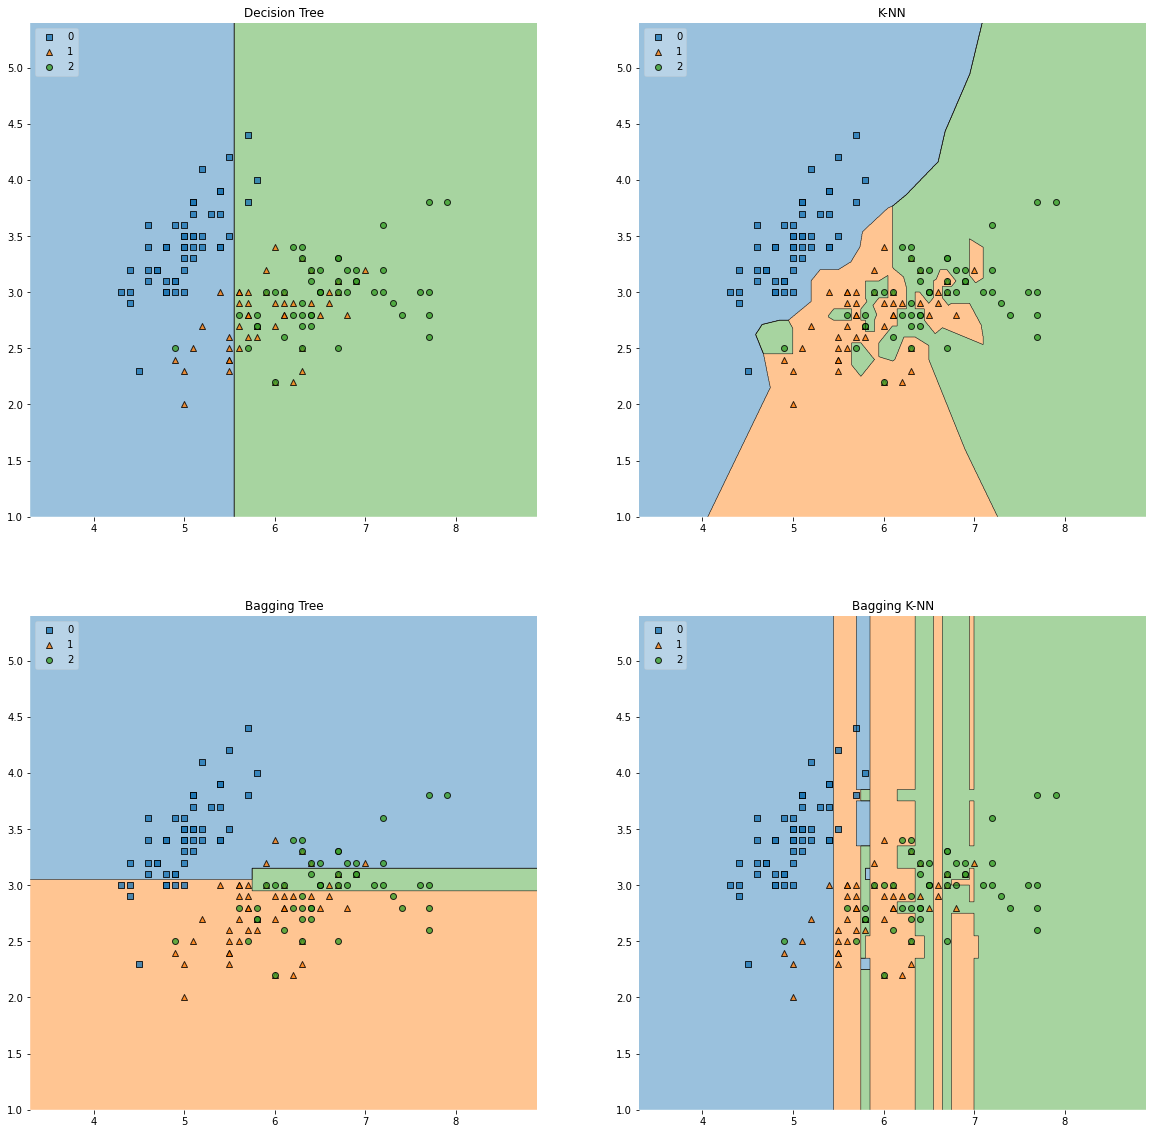

In [3]:
label = ['Decision Tree', 'K-NN', 'Bagging Tree', 'Bagging K-NN']
clf_list = [clf1, clf2, bagging1, bagging2]

fig = plt.figure(figsize=(20, 20))
gs = gridspec.GridSpec(2, 2)
grid = itertools.product([0,1],repeat=2)

for clf, label, grd in zip(clf_list, label, grid):        
    scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    print("Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label))
        
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(label)

plt.show()

### Boosting

Boosting refers to a family of algorithms that are able to convert weak learners to strong learners. The main principle of boosting is to fit a sequence of weak learners (models that are only slightly better than random guessing, such as small decision trees) to weighted versions of the data, where more weight is given to examples that were mis-classified by earlier rounds. The predictions are then combined through a weighted majority vote (classification) or a weighted sum (regression) to produce the final prediction. The principal difference between boosting and the committee methods such as bagging is that base learners are trained in sequence on a weighted version of the data.   

In [4]:
import itertools
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from sklearn import datasets

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score, train_test_split

from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions

In [5]:
# Dataset load
iris = datasets.load_iris()
X, y = iris.data[:, 0:2], iris.target
    
# Defining decision tree
clf_1 = DecisionTreeClassifier(criterion='entropy', max_depth=1)
clf_2 = DecisionTreeClassifier(criterion='entropy', max_depth=2)

# Defining number of iterations for boosting
num_est_low = [1, 2, 3, 10]
num_est_high = [25, 50, 100, 200]
label_low = ['AdaBoost (n_est=1)', 'AdaBoost (n_est=2)', 'AdaBoost (n_est=3)', 'AdaBoost (n_est=10)']
label_high = ['AdaBoost (n_est=25)', 'AdaBoost (n_est=50)', 'AdaBoost (n_est=100)', 'AdaBoost (n_est=200)']

1 Max Depth = 1

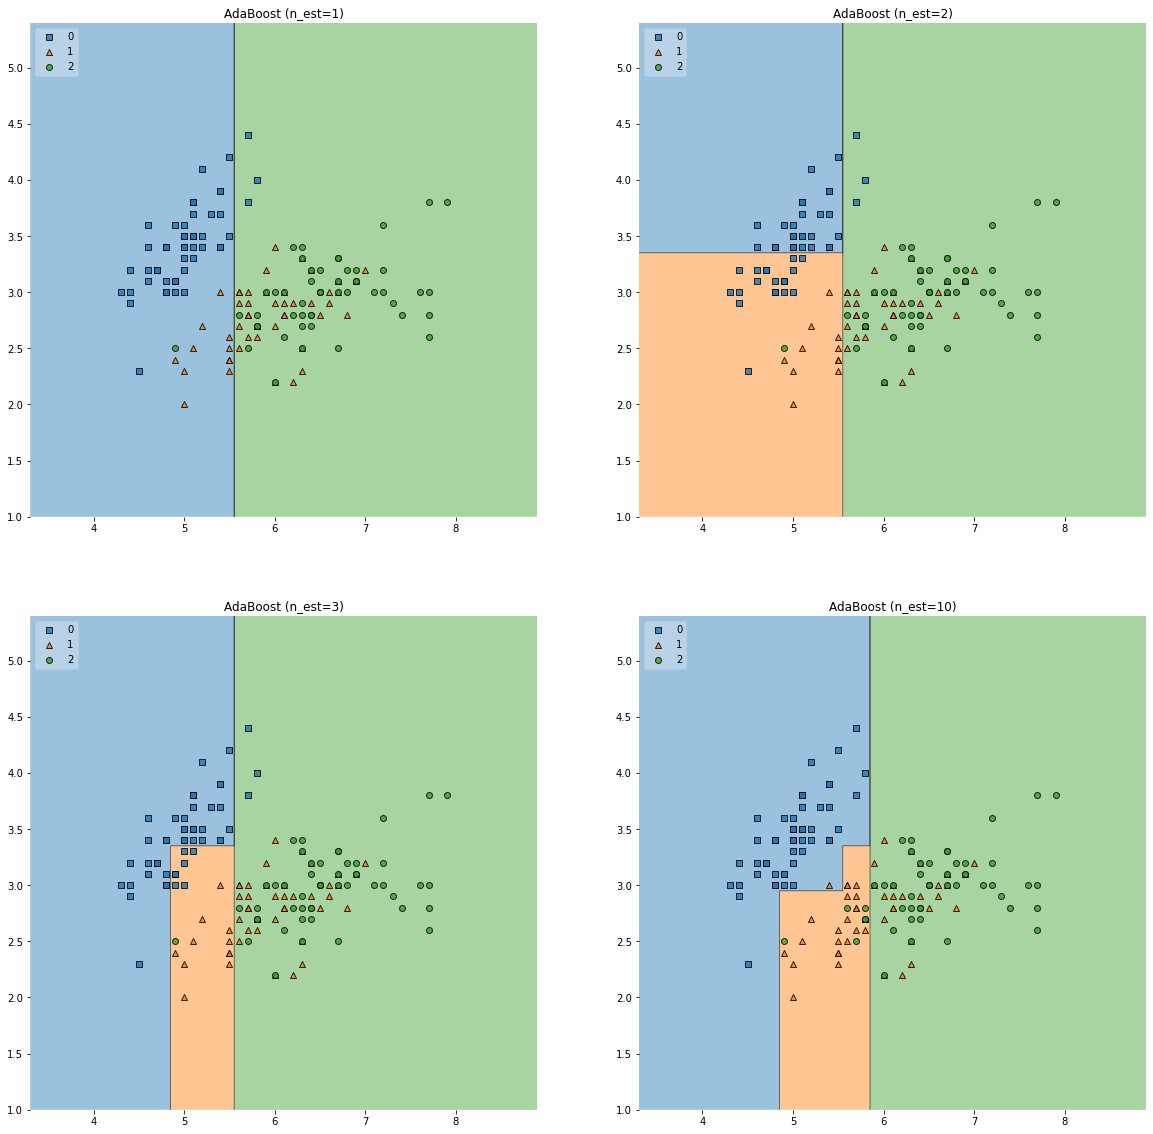

In [6]:
fig = plt.figure(figsize=(20, 20))
gs = gridspec.GridSpec(2, 2)
grid = itertools.product([0,1],repeat=2)

for num_est_low, label_low, grd in zip(num_est_low, label_low, grid):     
    boosting = AdaBoostClassifier(base_estimator=clf_1, n_estimators=num_est_low)   
    boosting.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=boosting, legend=2)
    plt.title(label_low)

plt.show()

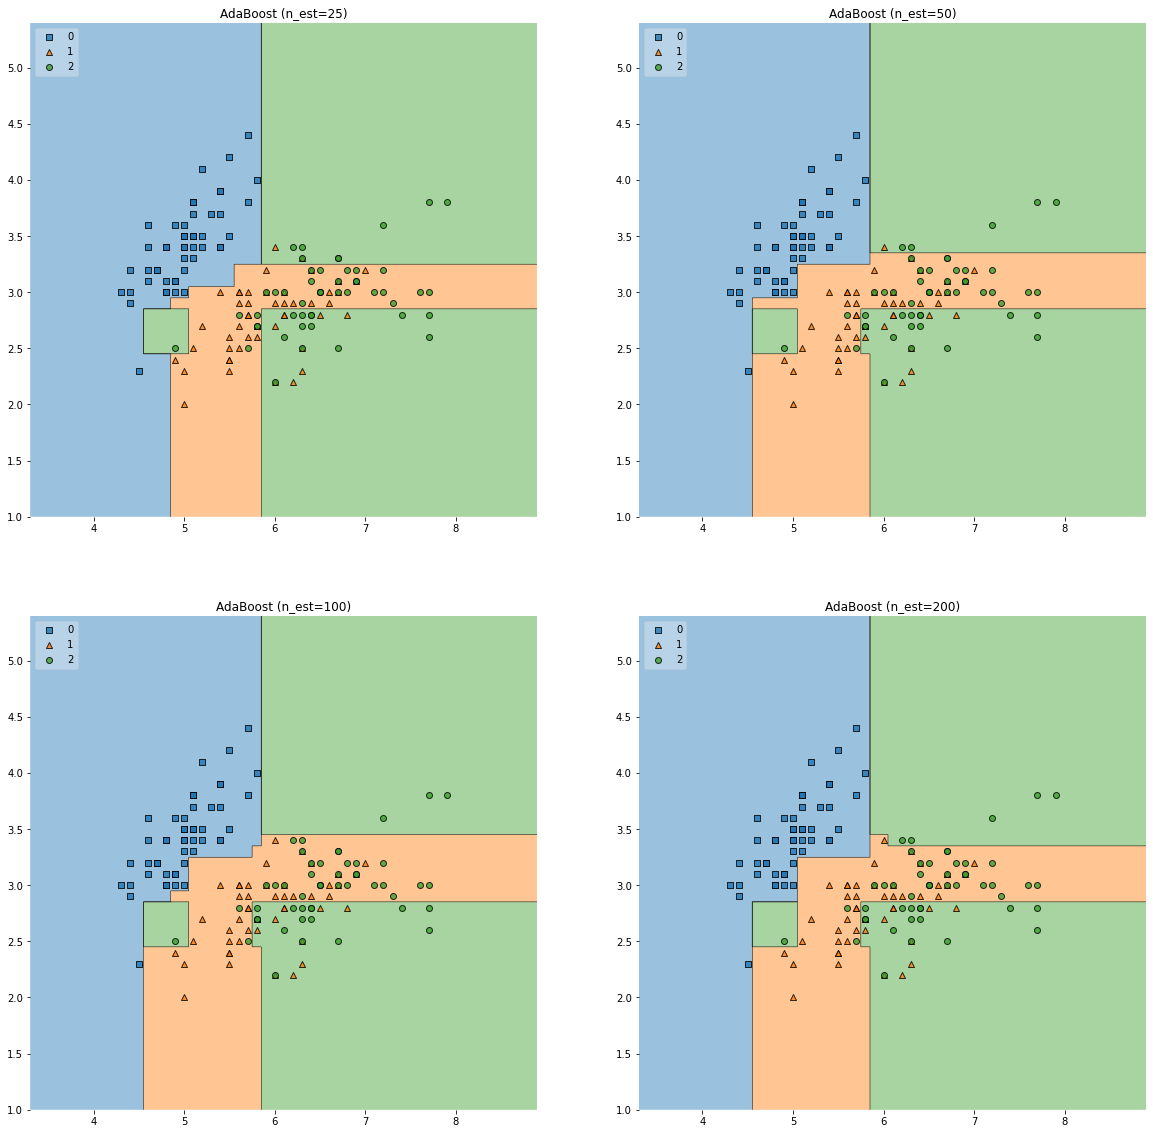

In [7]:
fig = plt.figure(figsize=(20, 20))
gs = gridspec.GridSpec(2, 2)
grid = itertools.product([0,1],repeat=2)

for num_est_low, label_low, grd in zip(num_est_high, label_high, grid):     
    boosting = AdaBoostClassifier(base_estimator=clf_1, n_estimators=num_est_low)   
    boosting.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=boosting, legend=2)
    plt.title(label_low)

plt.show()

The AdaBoost algorithm is illustrated in the figure above. Each base learner consists of a decision tree with depth $1$, thus classifying the data based on a feature threshold that partitions the space into two regions separated by a linear decision surface that is parallel to one of the axes.

### Stacking

Stacking is an ensemble learning technique that combines multiple classification or regression models via a meta-classifier or a meta-regressor. The base level models are trained based on complete training set then the meta-model is trained on the outputs of base level model as features. The base level often consists of different learning algorithms and therefore stacking ensembles are often heterogeneous.

In [8]:
import itertools
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from sklearn import datasets

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from mlxtend.classifier import StackingClassifier

from sklearn.model_selection import cross_val_score, train_test_split

from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions

In [9]:
iris = datasets.load_iris()
X, y = iris.data[:, 1:3], iris.target

clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = DecisionTreeClassifier()
clf3 = LogisticRegression()

gbt = GradientBoostingClassifier(subsample= 0.6, learning_rate = 0.06, n_estimators= 3000)
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], 
                          meta_classifier=gbt)

Accuracy: 0.91 (+/- 0.07) [KNN]
Accuracy: 0.91 (+/- 0.03) [Decision Tree]
Accuracy: 0.95 (+/- 0.04) [Logistic Regression]
Accuracy: 0.91 (+/- 0.06) [Stacking Classifier]


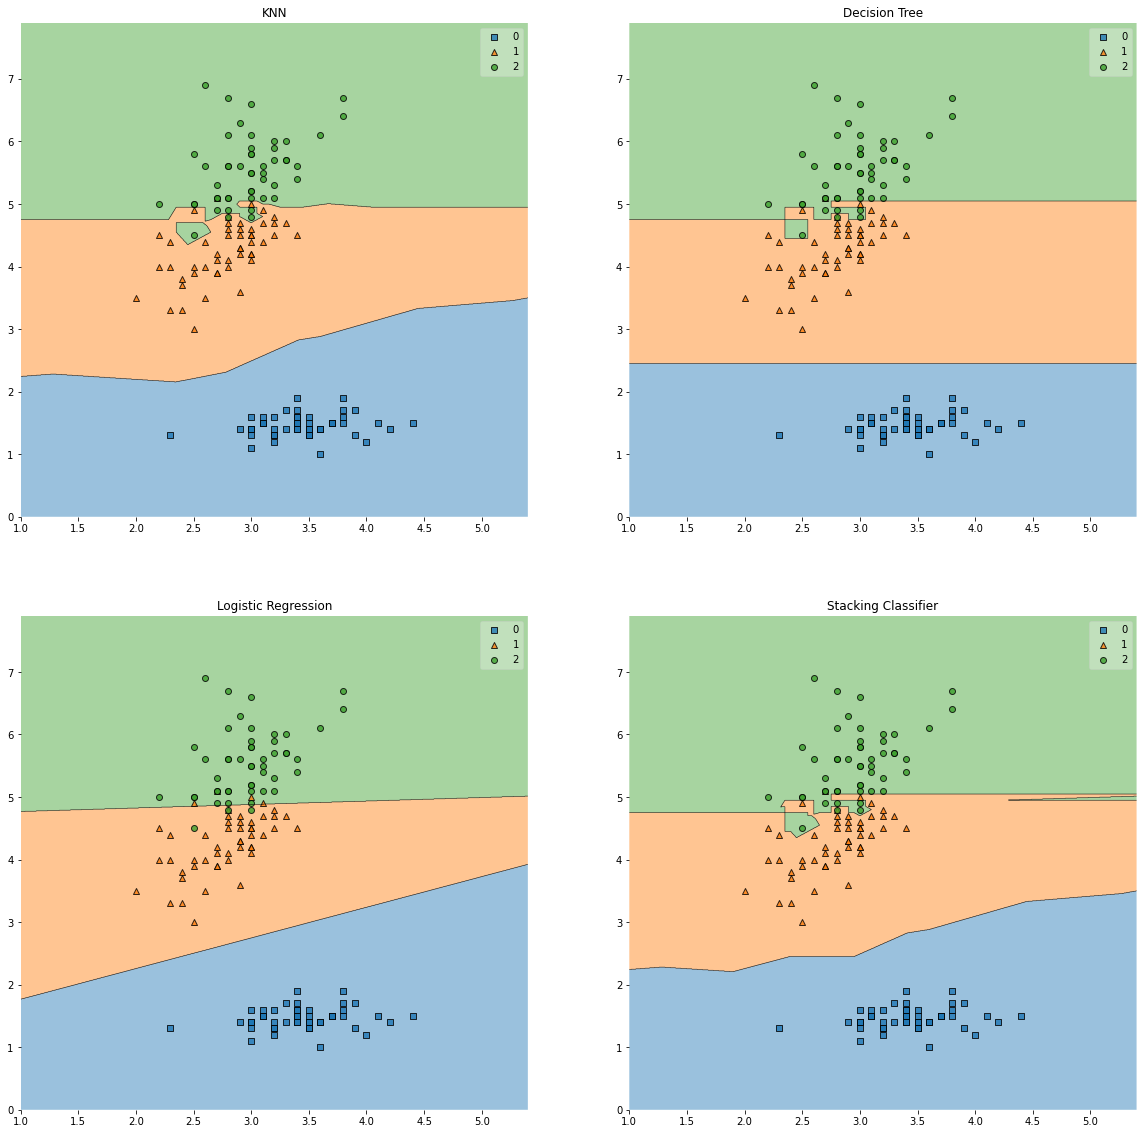

In [10]:
label = ['KNN', 'Decision Tree', 'Logistic Regression', 'Stacking Classifier']
clf_list = [clf1, clf2, clf3, sclf]
    
fig = plt.figure(figsize=(20,20))
gs = gridspec.GridSpec(2, 2)
grid = itertools.product([0,1],repeat=2)

clf_cv_mean = []
clf_cv_std = []
for clf, label, grd in zip(clf_list, label, grid):
        
    scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    print("Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label))
    clf_cv_mean.append(scores.mean())
    clf_cv_std.append(scores.std())
        
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf)
    plt.title(label)

plt.show()

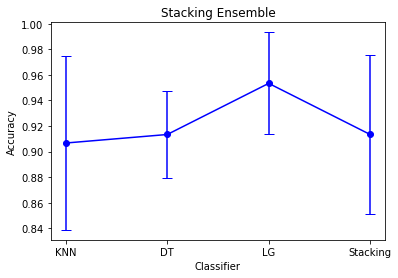

In [11]:
#plot classifier accuracy    
plt.figure()
(_, caps, _) = plt.errorbar(range(4), clf_cv_mean, yerr=clf_cv_std, c='blue', fmt='-o', capsize=5)
for cap in caps:
    cap.set_markeredgewidth(1)                                                                                                                                
plt.xticks(range(4), ['KNN', 'DT', 'LG', 'Stacking'])        
plt.ylabel('Accuracy'); plt.xlabel('Classifier'); plt.title('Stacking Ensemble');
plt.show()